In [1]:
import numpy as np
import pandas as pd

C:\Users\shubh\AppData\Local\Temp\ipykernel_29136\1662815981.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df_confirmed_cases = pd.read_csv("time_series_covid19_confirmed_US.csv")

df_deaths = pd.read_csv("time_series_covid19_deaths_US.csv")

df_vaccinations = pd.read_csv("us_state_vaccinations.csv")

In [3]:
import pandas as pd
import folium

# Load the vaccination dataset
df_vaccinations = pd.read_csv("us_state_vaccinations.csv")

# Select relevant columns (state, latitude, longitude, total_vaccinations)
df_vaccinations = df_vaccinations[['location', 'total_vaccinations', 'Lat', 'Long_']]

# Drop rows with missing latitude or longitude values
df_vaccinations = df_vaccinations.dropna(subset=['Lat', 'Long_'])

# Create a Folium map centered on the United States
us_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Add markers for each state with the size of the marker based on total vaccinations
for index, row in df_vaccinations.iterrows():
    folium.CircleMarker(
        location=[row['Lat'], row['Long_']],
        radius=row['total_vaccinations'] / 100000,  # Adjust the divisor for appropriate marker size
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        tooltip=f"{row['location']}: {row['total_vaccinations']} vaccinations"
    ).add_to(us_map)

# Display the map
us_map.save('vaccination_map.html')


KeyError: "['Lat', 'Long_'] not in index"

<Figure size 1000x600 with 0 Axes>

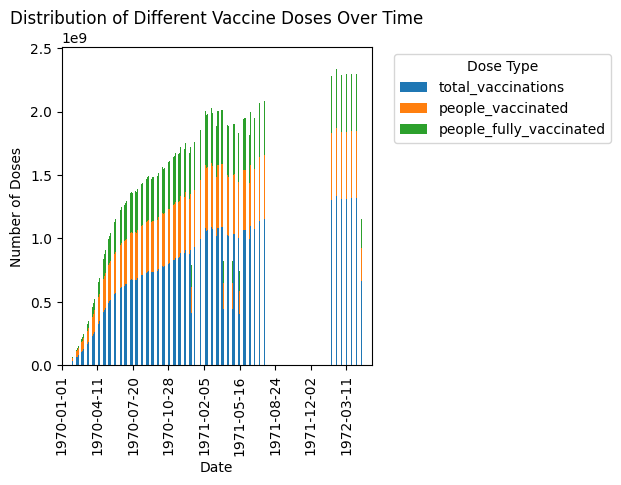

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Load the vaccination dataset
df_vaccinations = pd.read_csv("us_state_vaccinations.csv")

# Select relevant columns (date, total_vaccinations, people_vaccinated, people_fully_vaccinated)
df_vaccinations = df_vaccinations[['date', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']]

# Convert date column to datetime format
df_vaccinations['date'] = pd.to_datetime(df_vaccinations['date'])

# Group by date and sum the doses for each type
df_grouped = df_vaccinations.groupby('date').sum()

# Plot stacked bar chart
plt.figure(figsize=(10, 6))
df_grouped.plot(kind='bar', stacked=True)

# Set x-axis tick frequency
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Adjust the number of ticks as needed

plt.title('Distribution of Different Vaccine Doses Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Doses')
plt.legend(title='Dose Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, fixed

# Load the vaccination dataset
df_vaccinations = pd.read_csv("us_state_vaccinations.csv")

# Function to plot total vaccinations based on selected date range and location
def plot_vaccinations(start_date, end_date, location):
    # Filter the dataset based on selected date range and location
    df_filtered = df_vaccinations[(df_vaccinations['date'] >= start_date) & 
                                  (df_vaccinations['date'] <= end_date) &
                                  (df_vaccinations['location'] == location)]
    
    # Plot total vaccinations
    plt.figure(figsize=(10, 6))
    plt.plot(df_filtered['date'], df_filtered['total_vaccinations'], marker='o', linestyle='-')
    plt.title(f'Total Vaccinations in {location} ({start_date} to {end_date})')
    plt.xlabel('Date')
    plt.ylabel('Total Vaccinations')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Define date range widget
start_date_widget = widgets.DatePicker(description='Start Date:', value=df_vaccinations['date'].min())
end_date_widget = widgets.DatePicker(description='End Date:', value=df_vaccinations['date'].max())

# Define location selection widget
location_widget = widgets.Dropdown(description='Location:', options=df_vaccinations['location'].unique())

# Interactively update the plot based on selected date range and location
interact(plot_vaccinations, start_date=start_date_widget, end_date=end_date_widget, location=location_widget)


AttributeError: 'str' object has no attribute 'year'